In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


In [2]:
df = pd.read_csv("gas_turbines.csv")

In [3]:
df1 = df.copy()

In [4]:
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
df1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


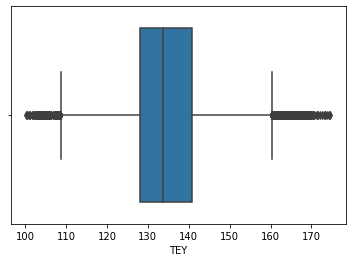

In [8]:
ax = sns.boxplot(df1['TEY'])

there are outliers

In [11]:
plt.rcParams['figure.figsize']=9,5

Skew: 0.14596270190452942
Kurtosis:-0.4870582497451621


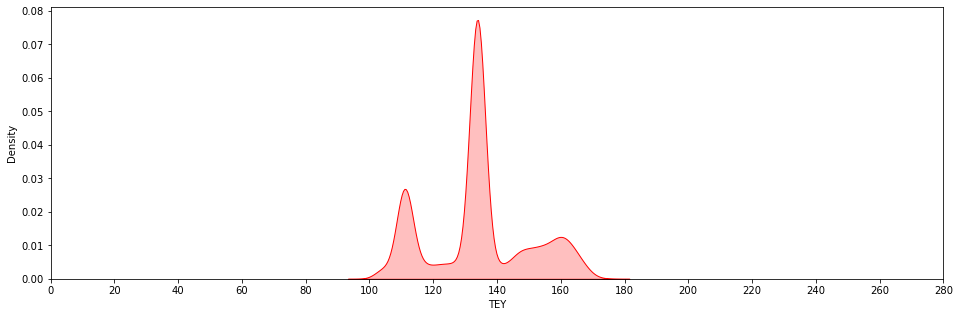

In [16]:
plt.figure(figsize=(16,5))
print("Skew: {}" .format(df1['TEY'].skew()))
print("Kurtosis:{}". format(df1['TEY'].kurtosis()))
ax = sns.kdeplot(df1['TEY'],shade=True, color ='r')
plt.xticks([i for i in range(0,300,20)])
plt.show()

In [19]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include ='object').columns.tolist()

In [20]:
plt.figure(figsize=(16,10))
for i, col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa, y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize = True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("% distribution per category")
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [21]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

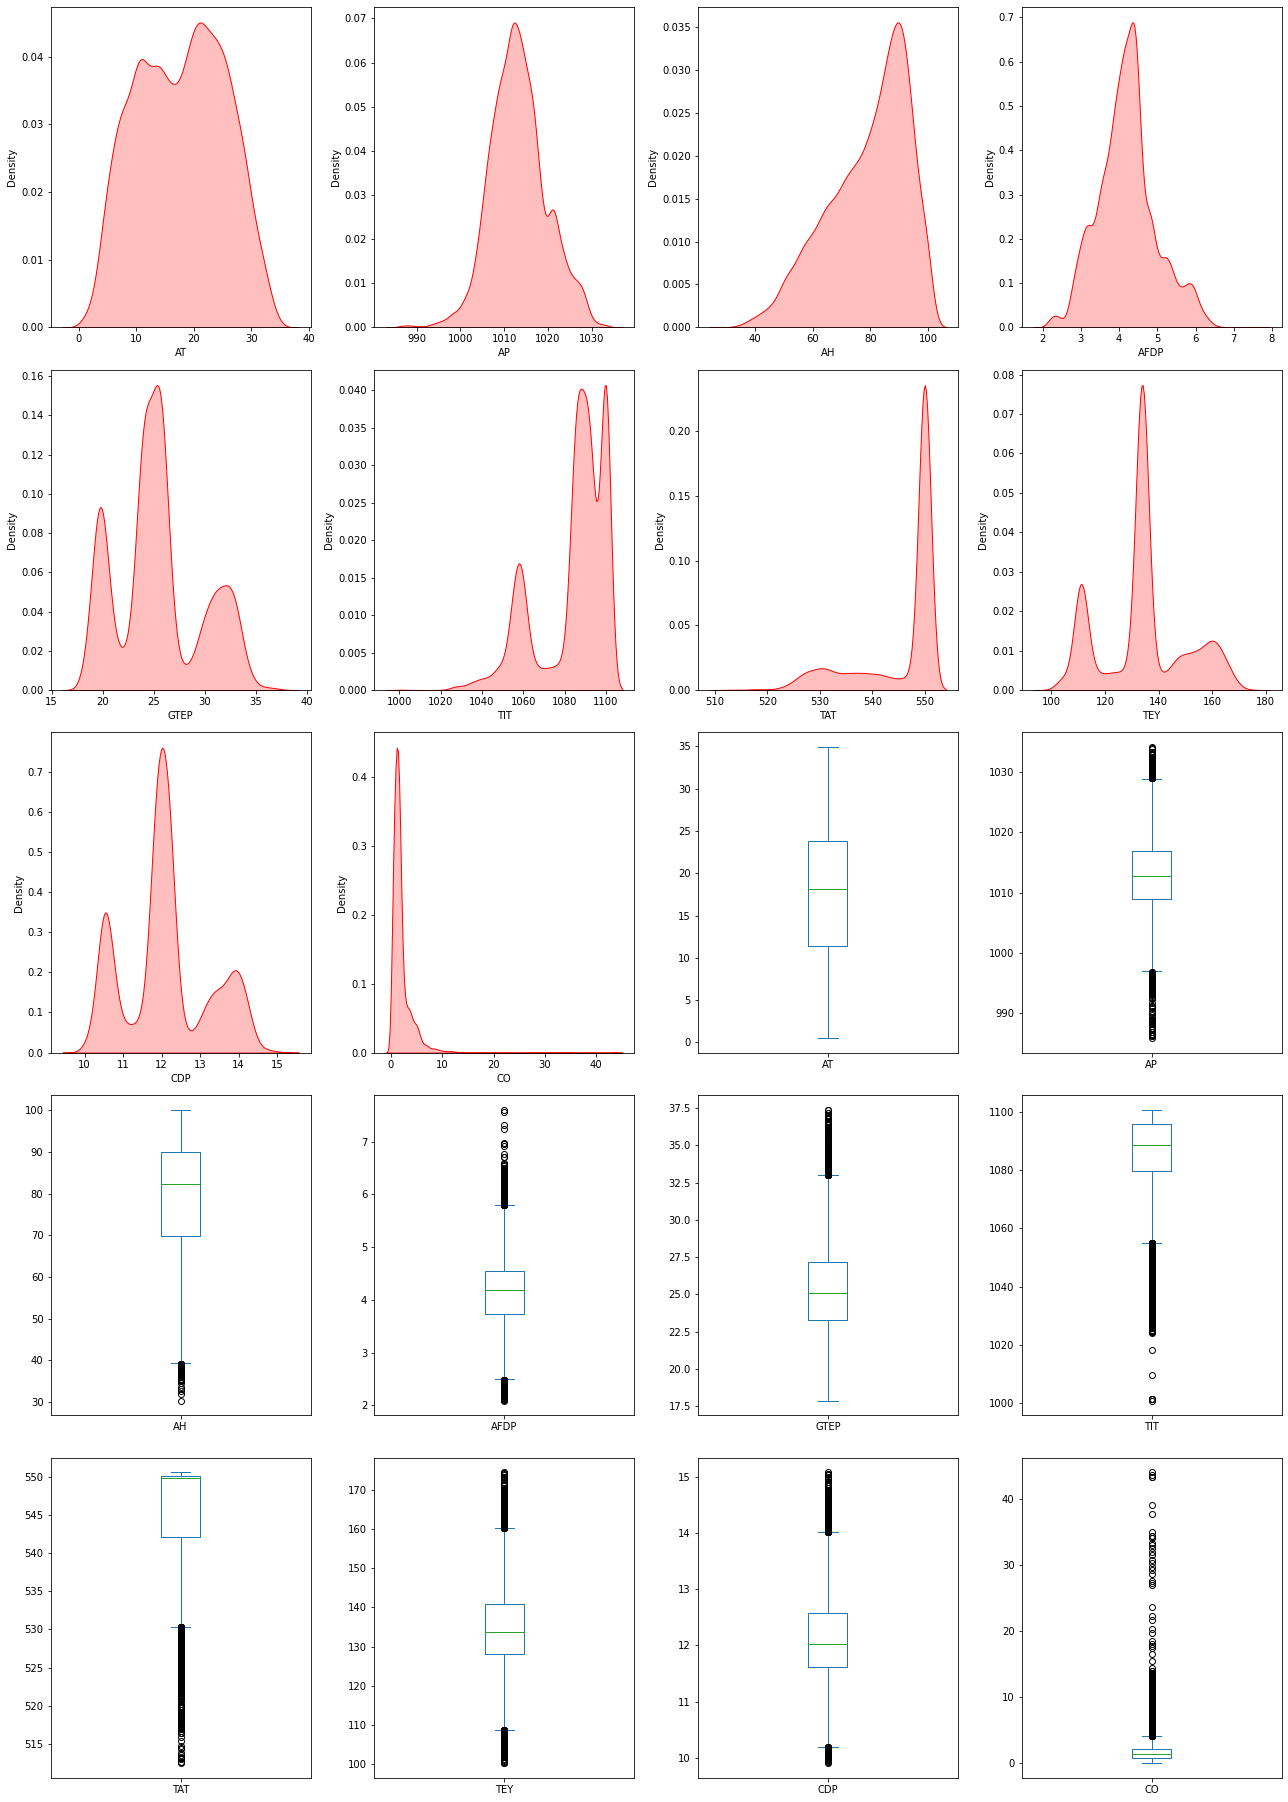

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [23]:
plt.figure(figsize=(18,40))
for i, col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color='r',shade= True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [24]:
corr = df1[df1.columns[0:11]].corr()

<AxesSubplot:>

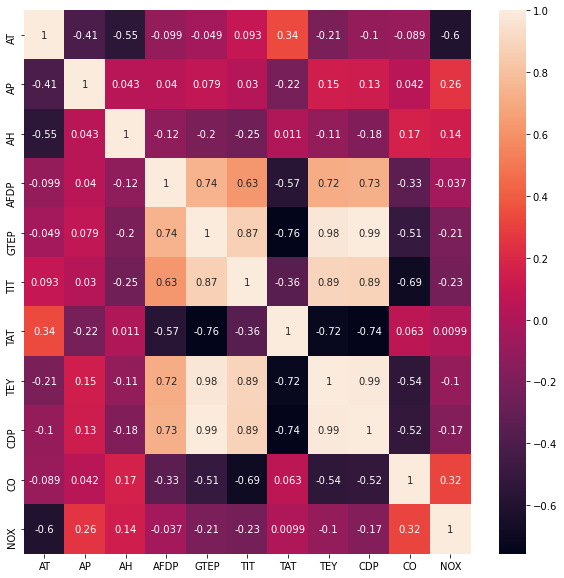

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [26]:
mapping = {'small':1 ,'large':2}

In [27]:
df1 = df1.replace(mapping)

In [28]:
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [33]:
X = np.array(df1.iloc[:,0:11])
y = np.array(df1.iloc[:,7])

In [34]:
X.shape


(15039, 11)

In [35]:
y.shape

(15039,)

In [36]:
y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [37]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [41]:

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1204/1204 [==============================] - 1s 768us/step - loss: -4730701.0594 - accuracy: 0.0000e+00 0s - loss: -4548444.9442 - accuracy: 0.0000e+0
Epoch 2/150
1204/1204 [==============================] - 1s 761us/step - loss: -184707859.8971 - accuracy: 0.0000e+00
Epoch 3/150
1204/1204 [==============================] - 1s 761us/step - loss: -960813085.8490 - accuracy: 0.0000e+00
Epoch 4/150
1204/1204 [==============================] - 1s 767us/step - loss: -2519789278.2207 - accuracy: 0.0000e+00
Epoch 5/150
1204/1204 [==============================] - 1s 778us/step - loss: -4954550287.5087 - accuracy: 0.0000e+00
Epoch 6/150
1204/1204 [==============================] - 1s 867us/step - loss: -8409959316.5012 - accuracy: 0.0000e+00
Epoch 7/150
1204/1204 [==============================] - 1s 772us/step - loss: -12949968409.9187 - accuracy: 0.0000e+00
Epoch 8/150
1204/1204 [==============================] - 1s 795us/step - loss: -18735011069.2382 - accuracy: 0.0000e+00
Epoc

1204/1204 [==============================] - 1s 783us/step - loss: -6366145364063.1768 - accuracy: 0.0000e+00
Epoch 68/150
1204/1204 [==============================] - 1s 774us/step - loss: -6636542936358.8779 - accuracy: 0.0000e+00
Epoch 69/150
1204/1204 [==============================] - 1s 765us/step - loss: -6917005161838.2607 - accuracy: 0.0000e+00
Epoch 70/150
1204/1204 [==============================] - 1s 789us/step - loss: -7210172471039.3623 - accuracy: 0.0000e+00
Epoch 71/150
1204/1204 [==============================] - 1s 771us/step - loss: -7514023993473.1689 - accuracy: 0.0000e+00
Epoch 72/150
1204/1204 [==============================] - 1s 772us/step - loss: -7796817460105.8789 - accuracy: 0.0000e+00
Epoch 73/150
1204/1204 [==============================] - 1s 778us/step - loss: -8115895868046.3398 - accuracy: 0.0000e+00
Epoch 74/150
1204/1204 [==============================] - 1s 774us/step - loss: -8444342288343.2100 - accuracy: 0.0000e+00
Epoch 75/150
1204/1204 [=====

1204/1204 [==============================] - 1s 783us/step - loss: -43430750230774.4375 - accuracy: 0.0000e+00
Epoch 132/150
1204/1204 [==============================] - 1s 778us/step - loss: -44351744459064.7266 - accuracy: 0.0000e+00
Epoch 133/150
1204/1204 [==============================] - 1s 783us/step - loss: -45338766496474.8203 - accuracy: 0.0000e+00
Epoch 134/150
1204/1204 [==============================] - 1s 772us/step - loss: -46327828062065.2344 - accuracy: 0.0000e+00
Epoch 135/150
1204/1204 [==============================] - 1s 781us/step - loss: -47481323831744.6875 - accuracy: 0.0000e+00
Epoch 136/150
1204/1204 [==============================] - 1s 777us/step - loss: -48448147260180.6094 - accuracy: 0.0000e+00
Epoch 137/150
1204/1204 [==============================] - 1s 778us/step - loss: -49391389618859.2344 - accuracy: 0.0000e+00
Epoch 138/150
1204/1204 [==============================] - 1s 975us/step - loss: -50412846655418.3203 - accuracy: 0.0000e+00
Epoch 139/150


In [44]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

376/376 [==============================] - 0s 527us/step - loss: -65160081309696.0000 - accuracy: 0.0000e+00
Accuracy: 0.00


In [45]:
predictions = model.predict_classes(x_train)

C:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.8594, 1007.9, 96.799, 3.5, 19.663, 1059.2, 550.0, 114.7, 10.605, 3.1547, 82.722] => 1 (expected 114)
[6.785, 1008.4, 97.118, 3.4998, 19.728, 1059.3, 550.0, 114.72, 10.598, 3.2363, 82.776] => 1 (expected 114)
[6.8977, 1008.8, 95.939, 3.4824, 19.779, 1059.4, 549.87, 114.71, 10.601, 3.2012, 82.468] => 1 (expected 114)
[7.0569, 1009.2, 95.249, 3.4805, 19.792, 1059.6, 549.99, 114.72, 10.606, 3.1923, 82.67] => 1 (expected 114)
[7.3978, 1009.7, 95.15, 3.4976, 19.765, 1059.7, 549.98, 114.72, 10.612, 3.2484, 82.311] => 1 (expected 114)
